In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')


# Import Data

In [30]:
df = pd.read_excel('Data/Default.xlsx')
df['default2'] = df.default.factorize()[0]
df['student2'] = df.student.factorize()[0]
df.head(3)

default student      balance        income  default2  student2
1      No      No   729.526495  44361.625074         0         0
2      No     Yes   817.180407  12106.134700         0         1
3      No      No  1073.549164  31767.138947         0         0

# 4.1

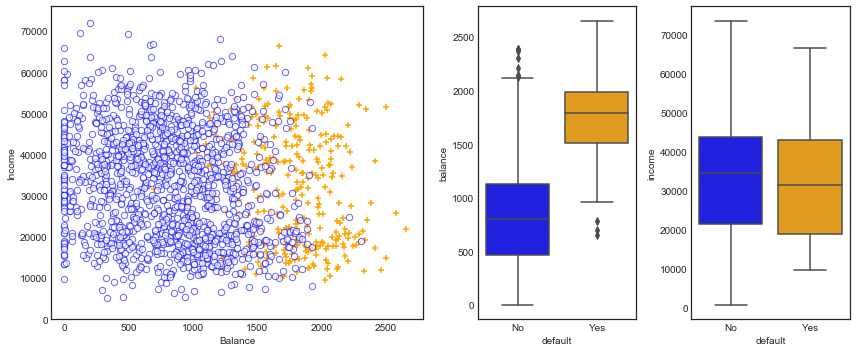

In [8]:
fig = plt.figure(figsize=(12,5))
gs = mpl.gridspec.GridSpec(1,4)
axis1 = plt.subplot(gs[0,:-2])
axis2 = plt.subplot(gs[0,-2])
axis3 = plt.subplot(gs[0,-1])

#Fraction of value no
df_no = df[df.default2 ==0].sample(frac=0.15)
#Fraction of value yes
df_yes = df[df.default2 ==1]
df_ = df_no.append(df_yes)

axis1.scatter(df_[df_.default == 'Yes'].balance, df_[df_.default == 'Yes'].income, s=40, c='orange', marker='+',  linewidths=1)
axis1.scatter(df_[df_.default == 'No'].balance, df_[df_.default == 'No'].income, s=40, marker='o',  linewidths=1, edgecolors = 'blue', facecolors='white', alpha=.6)

axis1.set_ylim(bottom=0) #replaces ymin
axis1.set_ylabel('Income')
axis1.set_xlim(left=-100) #replaces xmin
axis1.set_xlabel('Balance')

c_palette = {'No': 'Blue', 'Yes':'orange'}
sns.boxplot('default', 'balance', data=df, orient='v', ax=axis2, palette=c_palette)
sns.boxplot('default', 'income', data=df, orient='v', ax=axis3, palette=c_palette)
gs.tight_layout(plt.gcf())

## 4.3
### Figure 4.2

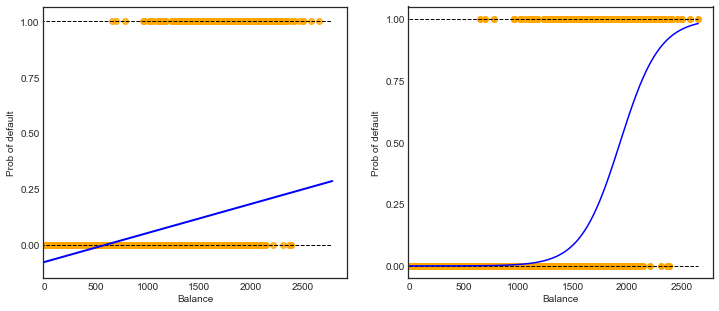

In [10]:
x_train = df.balance.values.reshape(-1,1)
y = df.default2

x_test = np.arange(df.balance.min(), df.balance.max()).reshape(-1,1)
clf = skl_lm.LogisticRegression(solver='newton-cg')
clf.fit(x_train,y)
prob=clf.predict_proba(x_test)

fig, (axis1, axis2) = plt.subplots(1,2, figsize=(12,5))

#Left
sns.regplot(df.balance, df.default2, order=1, ci=None,
           scatter_kws={'color':'Orange'},
           line_kws={'color':'Blue', 'lw':2}, ax=axis1)
#Right
axis2.scatter(x_train, y, color='orange')
axis2.plot(x_test, prob[:,1], color='blue')

for ax in fig.axes:
    ax.hlines(1, xmin=ax.xaxis.get_data_interval()[0],
             xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.hlines(0, xmin=ax.xaxis.get_data_interval()[0],
             xmax=ax.xaxis.get_data_interval()[1], linestyles='dashed', lw=1)
    ax.set_ylabel('Prob of default')
    ax.set_xlabel('Balance')
    ax.set_yticks([0.00, 0.25, 0.50, 0.75, 1.00])
    ax.set_xlim(left=-10)

### Table 4.1

In [11]:
y=df.default2

In [19]:
clf=skl_lm.LogisticRegression(solver='newton-cg')
x_train = df.balance.values.reshape(-1,1)
clf.fit(x_train,y)
print(clf)
print('\nclasses:      ', clf.classes_)
print('coefficients: ', clf.coef_)
print('intercept:    ', clf.intercept_)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)

classes:       [0 1]
coefficients:  [[0.00549892]]
intercept:     [-10.65133001]


In [20]:
x_train = sm.add_constant(df.balance)
est = smf.Logit(y.ravel(), x_train).fit()
est.summary2().tables

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


[                     0                 1                  2            3
 0               Model:             Logit  Pseudo R-squared:        0.453
 1  Dependent Variable:                 y               AIC:    1600.4517
 2                Date:  2019-02-27 18:51               BIC:    1614.8724
 3    No. Observations:             10000    Log-Likelihood:      -798.23
 4            Df Model:                 1           LL-Null:      -1460.3
 5        Df Residuals:              9998       LLR p-value:  6.2329e-290
 6           Converged:            1.0000             Scale:       1.0000
 7      No. Iterations:           10.0000                                ,
              Coef.  Std.Err.          z          P>|z|     [0.025    0.975]
 const   -10.651331  0.361169 -29.491287  3.723665e-191 -11.359208 -9.943453
 balance   0.005499  0.000220  24.952404  2.010855e-137   0.005067  0.005931]

## Table 4.2

In [31]:
x_train = sm.add_constant(df.student2)
y = df.default2

est = smf.Logit(y, x_train).fit()
est.summary(2).tables

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


[<class 'statsmodels.iolib.table.SimpleTable'>,
 <class 'statsmodels.iolib.table.SimpleTable'>]